In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [68]:
df = pd.read_csv("Bank_dataset.csv")

In [75]:
df.shape

(10000, 11)

In [70]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns', inplace=True)

In [73]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7216,679,France,Male,41,8,147726.98,3,1,0,172749.40,1
41,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
2896,782,France,Female,33,2,94493.03,1,0,1,101866.39,0
3828,497,Germany,Female,55,7,131778.66,1,1,1,9972.64,0
9191,572,France,Male,30,6,117696.67,1,1,0,100843.82,0


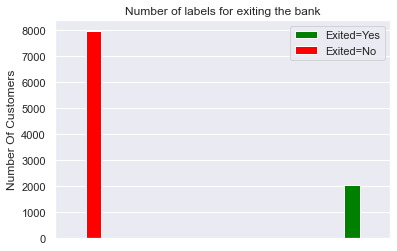

In [83]:
tenure_churn_no = df[df.Exited==0].Exited
tenure_churn_yes = df[df.Exited==1].Exited

# plt.xlabel("Tenure (Years)")
plt.ylabel("Number Of Customers")
plt.title("Number of labels for exiting the bank")
plt.xticks([])
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=1, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

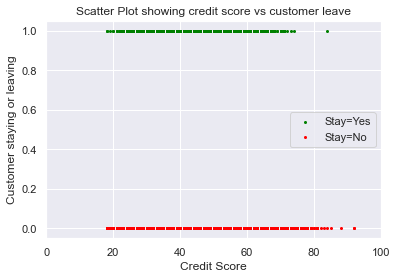

In [8]:
x_yes = df[df.Exited==1].Age
y_yes = df[df.Exited==1].Exited

x_no = df[df.Exited==0].Age
y_no = df[df.Exited==0].Exited

import seaborn as sns
sns.set()
plt.scatter(x_yes, y_yes, s=4, color='green', label='Stay=Yes')
plt.scatter(x_no, y_no, color='red', s=4, label='Stay=No')
plt.xlabel("Credit Score")
plt.ylabel("Customer staying or leaving")
plt.title("Scatter Plot showing credit score vs customer leave")
plt.xlim(0, 100)
plt.legend()

In [9]:
len(y_yes)

2037

In [10]:
x_yes

0       42
2       42
5       44
7       29
16      58
        ..
9981    42
9982    46
9991    53
9997    36
9998    42
Name: Age, Length: 2037, dtype: int64

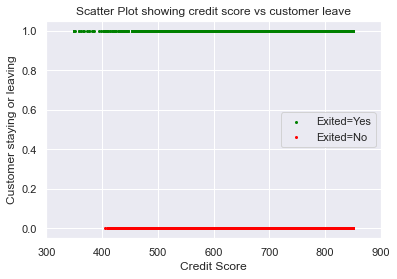

In [11]:
x_yes = df[df.Exited==1].CreditScore
y_yes = df[df.Exited==1].Exited

x_no = df[df.Exited==0].CreditScore
y_no = df[df.Exited==0].Exited

import seaborn as sns
sns.set()
plt.scatter(x_yes, y_yes, s=4, color='green', label='Exited=Yes')
plt.scatter(x_no, y_no, color='red', s=4, label='Exited=No')
plt.xlabel("Credit Score")
plt.ylabel("Customer staying or leaving")
plt.title("Scatter Plot showing credit score vs customer leave")
plt.xlim(300, 900)
plt.legend()

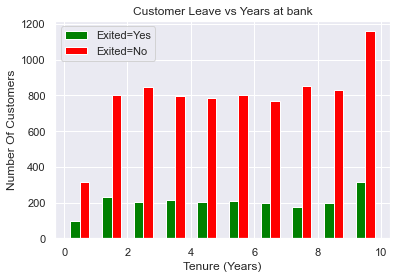

In [12]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure (Years)")
plt.ylabel("Number Of Customers")
plt.title("Customer Leave vs Years at bank")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.60, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

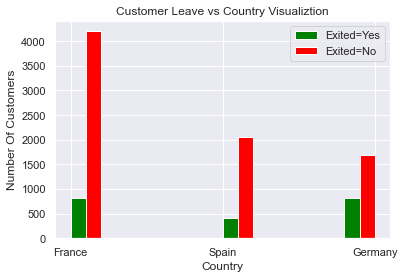

In [13]:
tenure_churn_no = df[df.Exited==0].Geography
tenure_churn_yes = df[df.Exited==1].Geography

plt.xlabel("Country")
plt.ylabel("Number Of Customers")
plt.title("Customer Leave vs Country Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=1, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

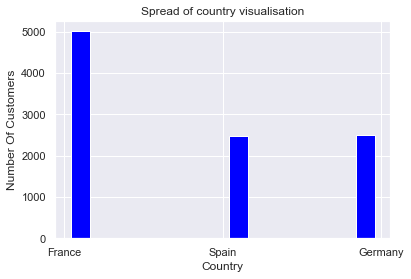

In [14]:
countries = df.Geography

plt.xlabel("Country")
plt.ylabel("Number Of Customers")
plt.title("Spread of country visualisation")

plt.hist(countries, rwidth=0.60, color='blue')
plt.show()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [18]:
yes_no_columns = ['Gender']
for col in yes_no_columns:
    df[col].replace({'Male': 1,'Female': 0},inplace=True)

In [19]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [20]:
df2 = pd.get_dummies(data=df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [21]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9141,850,0,43,8,92244.83,2,1,0,54949.73,0,0,1,0
5128,508,0,38,3,166328.65,2,0,1,22614.19,0,1,0,0
3657,731,1,30,7,0.00,2,1,1,184581.68,0,1,0,0
7205,683,0,29,9,0.00,2,1,1,48849.89,0,1,0,0
711,634,1,35,6,116269.01,1,1,0,129964.94,0,0,1,0


In [22]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [23]:
X_train.shape

(8000, 12)

In [24]:
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
r
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale] )
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

2022-07-20 14:16:04.242859: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 14:16:04.314681: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
250/250 [==============================] - 1s 930us/step - loss: 0.5173 - accuracy: 0.7801
Epoch 2/100
250/250 [==============================] - 0s 796us/step - loss: 0.4525 - accuracy: 0.8041
Epoch 3/100
250/250 [==============================] - 0s 856us/step - loss: 0.4332 - accuracy: 0.8123
Epoch 4/100
250/250 [==============================] - 0s 800us/step - loss: 0.4169 - accuracy: 0.8183
Epoch 5/100
250/250 [==============================] - 0s 786us/step - loss: 0.4010 - accuracy: 0.8255
Epoch 6/100
250/250 [==============================] - 0s 791us/step - loss: 0.3862 - accuracy: 0.8334
Epoch 7/100
250/250 [==============================] - 0s 865us/step - loss: 0.3742 - accuracy: 0.8385
Epoch 8/100
250/250 [==============================] - 0s 795us/step - loss: 0.3662 - accuracy: 0.8416
Epoch 9/100
250/250 [==============================] - 0s 857us/step - loss: 0.3611 - accuracy: 0.8454
Epoch 10/100
250/250 [==============================] - 0s 823us/step - l

In [26]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 664us/step - loss: 0.3735 - accuracy: 0.8440


[0.3734508156776428, 0.843999981880188]

In [27]:
yp = model.predict(X_test)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1595
           1       0.64      0.51      0.57       405

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.74      2000
weighted avg       0.83      0.84      0.84      2000



Text(66.5, 0.5, 'Truth')

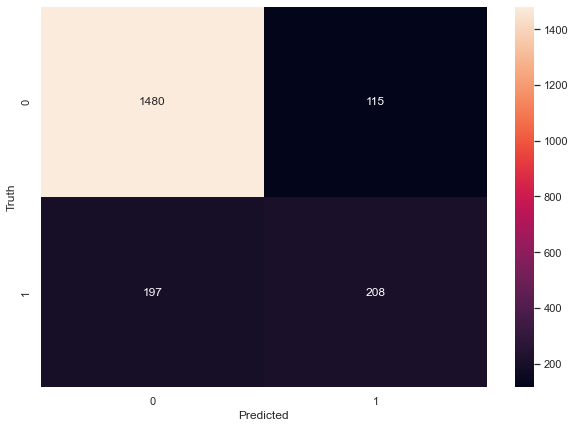

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
def ANN(X_train, y_train, X_test, y_test):
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100)
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

 # Undersampling

In [32]:
count_class_0, count_class_1 = df2.Exited.value_counts()

# Divide by class
df_class_0 = df2[df2['Exited'] == 0]
df_class_1 = df2[df2['Exited'] == 1]


In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [34]:
df_test_under.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7335,651,0,41,4,38617.20,1,1,1,104876.80,0,1,0,0
8974,706,0,43,1,0.00,2,1,0,31962.77,0,0,0,1
6131,686,1,60,9,0.00,3,1,1,75246.21,1,1,0,0
440,626,0,35,3,0.00,1,0,0,80190.36,0,1,0,0
9856,763,0,32,1,108465.65,2,1,0,60552.44,1,0,1,0


In [35]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale] )
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [37]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/100
102/102 [==============================] - 0s 847us/step - loss: 0.6819 - accuracy: 0.5704
Epoch 2/100
102/102 [==============================] - 0s 856us/step - loss: 0.6595 - accuracy: 0.6174
Epoch 3/100
102/102 [==============================] - 0s 865us/step - loss: 0.6409 - accuracy: 0.6392
Epoch 4/100
102/102 [==============================] - 0s 859us/step - loss: 0.6260 - accuracy: 0.6545
Epoch 5/100
102/102 [==============================] - 0s 852us/step - loss: 0.6146 - accuracy: 0.6680
Epoch 6/100
102/102 [==============================] - 0s 848us/step - loss: 0.6013 - accuracy: 0.6797
Epoch 7/100
102/102 [==============================] - 0s 825us/step - loss: 0.5830 - accuracy: 0.6901
Epoch 8/100
102/102 [==============================] - 0s 892us/step - loss: 0.5716 - accuracy: 0.7042
Epoch 9/100
102/102 [==============================] - 0s 863us/step - loss: 0.5590 - accuracy: 0.7140
Epoch 10/100
102/102 [==============================] - 0s 831us/step - l

# Oversampling

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [39]:
print(df_test_over.Exited.value_counts())

0    7963
1    7963
Name: Exited, dtype: int64


In [40]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [41]:
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale] )
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [42]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/100
399/399 [==============================] - 1s 804us/step - loss: 0.6517 - accuracy: 0.6146
Epoch 2/100
399/399 [==============================] - 0s 869us/step - loss: 0.5955 - accuracy: 0.6750
Epoch 3/100
399/399 [==============================] - 0s 831us/step - loss: 0.5686 - accuracy: 0.7040
Epoch 4/100
399/399 [==============================] - 0s 859us/step - loss: 0.5430 - accuracy: 0.7257
Epoch 5/100
399/399 [==============================] - 0s 890us/step - loss: 0.5160 - accuracy: 0.7529
Epoch 6/100
399/399 [==============================] - 0s 875us/step - loss: 0.4983 - accuracy: 0.7651
Epoch 7/100
399/399 [==============================] - 0s 867us/step - loss: 0.4909 - accuracy: 0.7659
Epoch 8/100
399/399 [==============================] - 0s 850us/step - loss: 0.4862 - accuracy: 0.7680
Epoch 9/100
399/399 [==============================] - 0s 805us/step - loss: 0.4839 - accuracy: 0.7668
Epoch 10/100
399/399 [==============================] - 0s 833us/step - l

# SMOTE

In [54]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

In [53]:
df2.shape

(10000, 13)

In [217]:
pip install imbalanced-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [231]:
pip install -U scikit-learn==1.1.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 8.6 MB 718 kB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


The scikit-learn version is 1.0.2.


In [56]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [59]:
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale] )
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test)

Epoch 1/100
399/399 [==============================] - 1s 859us/step - loss: 0.5223 - accuracy: 0.7531
Epoch 2/100
399/399 [==============================] - 0s 874us/step - loss: 0.4044 - accuracy: 0.8174
Epoch 3/100
399/399 [==============================] - 0s 876us/step - loss: 0.3911 - accuracy: 0.8246
Epoch 4/100
399/399 [==============================] - 0s 810us/step - loss: 0.3849 - accuracy: 0.8256
Epoch 5/100
399/399 [==============================] - 0s 937us/step - loss: 0.3786 - accuracy: 0.8295
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8319
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8361
Epoch 8/100
399/399 [==============================] - 0s 833us/step - loss: 0.3586 - accuracy: 0.8407
Epoch 9/100
399/399 [==============================] - 0s 847us/step - loss: 0.3518 - accuracy: 0.8433
Epoch 10/100
399/399 [==============================] - 0s 827us/step - loss:

In [65]:
len(y_pred)

2000

Text(66.5, 0.5, 'Truth')

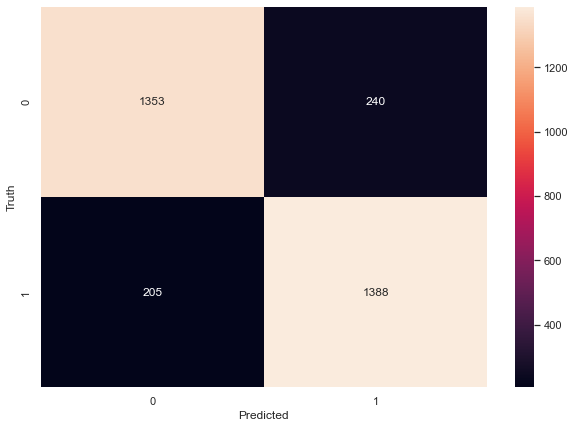

In [66]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')